<a href="https://colab.research.google.com/github/otabekds/Cars-price-predict/blob/main/main_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import library section 



In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data learning section 

In [59]:
df = pd.read_csv("/content/drive/MyDrive/Data science/real_projects/Car's_price_predict /auto_costs.csv")
df

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [60]:
df.info()  # there isn't NaN value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [62]:
df.isnull().sum().sum()

0

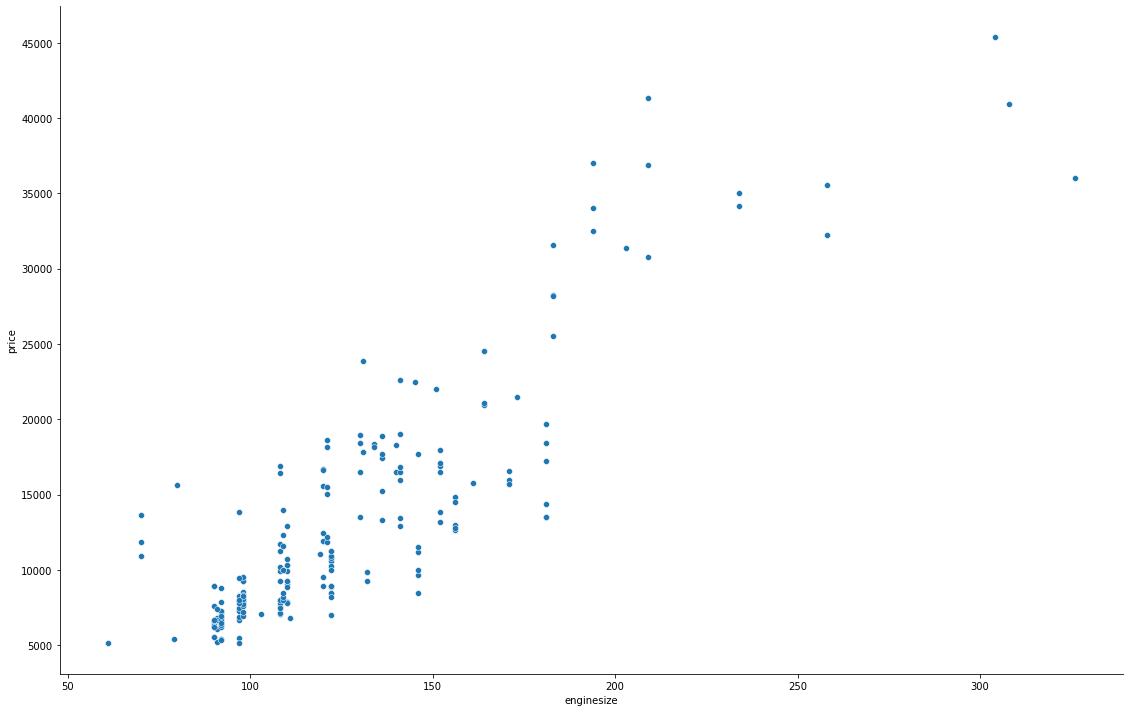

In [63]:
# This is the correlation of enginesize to price
sns.relplot(x='enginesize',y='price',data=df,height=10,aspect=1.58);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


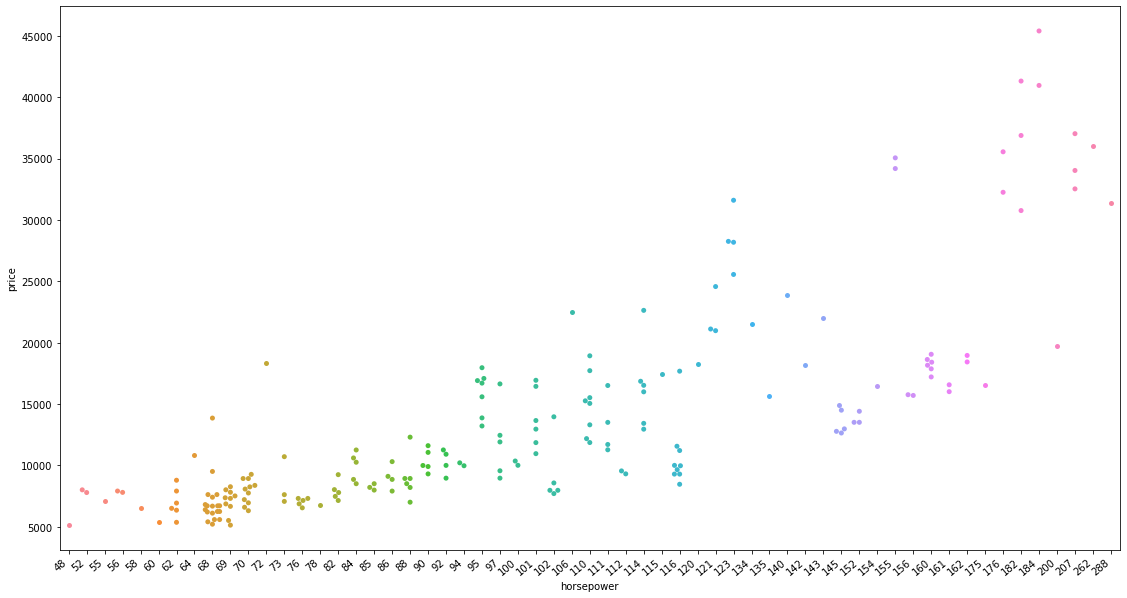

In [64]:
# This is the horsepower of enginesize to price
plt.subplots(figsize=(19,10))
ax=sns.swarmplot(x='horsepower',y='price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right');

In [65]:
encoder_label = LabelEncoder()
df.drivewheels = encoder_label.fit_transform(df.drivewheels)

keys = encoder_label.classes_
values = encoder_label.transform(encoder_label.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'4wd': 0, 'fwd': 1, 'rwd': 2}


In [66]:
encoder_label = LabelEncoder()
df.enginelocation = encoder_label.fit_transform(df.enginelocation)

keys = encoder_label.classes_
values = encoder_label.transform(encoder_label.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'front': 0, 'rear': 1}


In [67]:
df.corr().sort_values("price", ascending=False).iloc[:,-1:]

,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
drivewheels,0.577992
wheelbase,0.577816
boreratio,0.553173
enginelocation,0.324973


In [68]:
df2 = df[['enginesize', 'curbweight', 'horsepower', 'carwidth', 'drivewheels', 'enginelocation', 'price']]
df2

,enginesize,curbweight,horsepower,carwidth,drivewheels,enginelocation,price
0,130,2548,111,64.1,2,0,13495.0
1,130,2548,111,64.1,2,0,16500.0
2,152,2823,154,65.5,2,0,16500.0
3,109,2337,102,66.2,1,0,13950.0
4,136,2824,115,66.4,0,0,17450.0
...,...,...,...,...,...,...,...
200,141,2952,114,68.9,2,0,16845.0
201,141,3049,160,68.8,2,0,19045.0
202,173,3012,134,68.9,2,0,21485.0
203,145,3217,106,68.9,2,0,22470.0


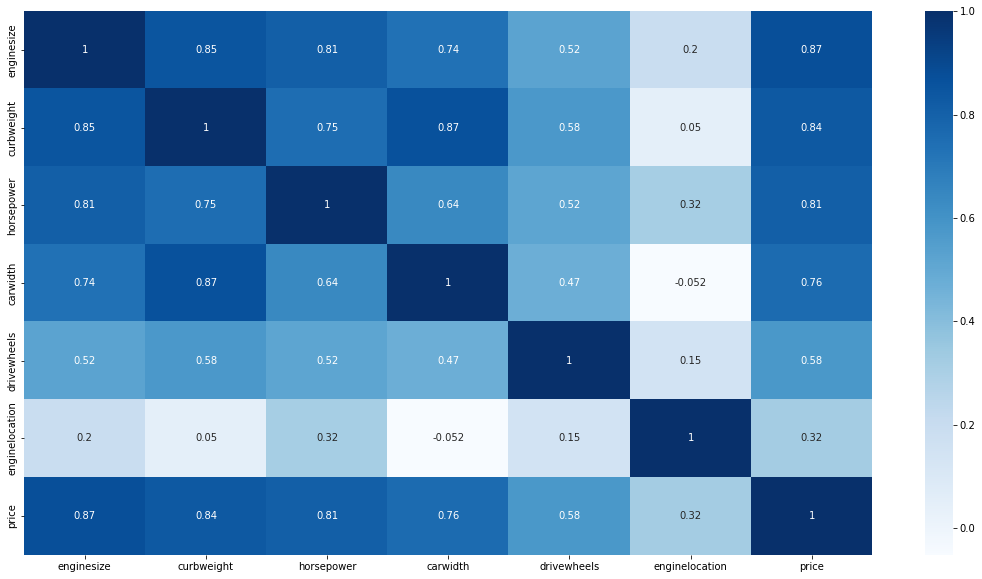

In [69]:
plt.subplots(figsize=(19,10))
sns.heatmap(df2.corr(), annot=True, cmap="Blues");

In [70]:
x_set = df2.drop('price', axis=1)
y_set = df2[['price']]

# Split
X_train, X_validation, Y_train, Y_validation = train_test_split(x_set, y_set, test_size=0.20, random_state= 28)

#Machine learning section 


In [71]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [72]:
y_pred = model.predict(X_validation)

#Model evaluation section 

In [73]:
print(f"Model aniqligi : {round(r2_score(Y_validation,y_pred)*100)}%")

Model aniqligi : 88%


In [74]:
data = {'enginesize' : 120, 'curbweight' : 1577, 'horsepower' : 200, 'carwidth' : 70, 'drivewheels' : 2, 'enginelocation' : 0, 'Model' : 'Malibu'}
test = pd.DataFrame(data=data, index=[1])
test

,enginesize,curbweight,horsepower,carwidth,drivewheels,enginelocation,Model
1,120,1577,200,70,2,0,Malibu


In [75]:
price = int(model.predict(test.iloc[:,:-1]))
name = test.iloc[0, 6]

In [76]:
print(f"Madel : {name}\nPrice : {price}$")

Madel : Malibu
Price : 6855$
